Source: https://gitlab.com/andsta/diro2c/-/blob/develop/show_decision_boundaries_running_ex.py

Summary: Difference class $(0,1)$ occurs for $x2 ≤ -107.5 \land -16.5 < x1 ≤ -7.5$ or $x2 > 96.5 \land -206.0 < x1 ≤ -8.5$ and difference class $(1,0)$ occurs for $-7.5 < x1 ≤ 149.5 \land -107.5 < x2 ≤ 96.5$

In [20]:
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.metrics import f1_score
from sklearn import svm
import copy
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import generate_diro2c_explanation, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import get_rules

In [2]:
X1, y1 = make_classification(n_samples=300, n_features=2,
                             n_informative=1, n_redundant=0, n_classes=2, random_state=2, n_clusters_per_class=1, class_sep=1.8, flip_y=0, scale=100)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=1)
# -----------------------------------------------
# train BB 1:

blackbox1 = DecisionTreeClassifier(random_state=1)
blackbox1.fit(X1_train, y1_train)

# -----------------------------------------------
# manipulate and train BB 2:
X2 = copy.deepcopy(X1)
y2 = copy.deepcopy(y1)
y2_new = []
for x_0, y_0 in zip(X2, y2):
    if x_0[0] < 150 and x_0[0] > 0 and x_0[1] > -100 and x_0[1] < 100 and y_0 == 1:
        y2_new.append(0)
    elif x_0[0] < 0 and x_0[0] > -200 and x_0[1] >= 100 and y_0 == 0:
        y2_new.append(1)
    else:
        y2_new.append(y_0)

X2 = np.asarray(X2)
y2 = np.asarray(y2_new)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=1)

blackbox2 = DecisionTreeClassifier(random_state=1)
blackbox2.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=1)

In [3]:
feature1 = []
feature2 = []
for x in X1:
    feature1.append(x[0])
    feature2.append(x[1])

for x in X2:
    feature1.append(x[0])
    feature2.append(x[1])

feature1 = np.asarray(feature1)
feature2 = np.asarray(feature2)

y = np.concatenate((y1, y2))

In [4]:
X = np.vstack([feature1, feature2]).T

In [5]:
feature_names = np.array(['x1', 'x2'])

In [6]:
comparer = ModelComparer(blackbox1, blackbox2, feature_names)

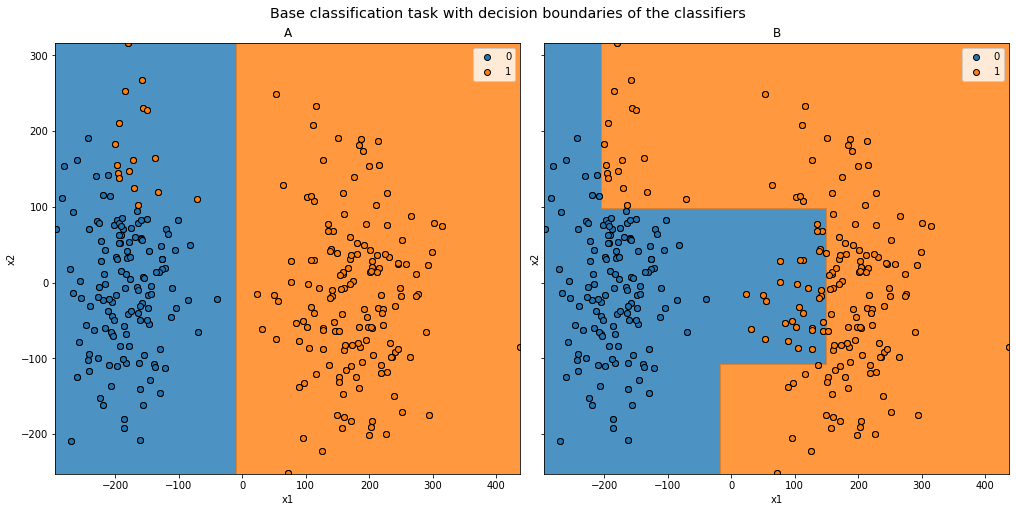

In [7]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='label')

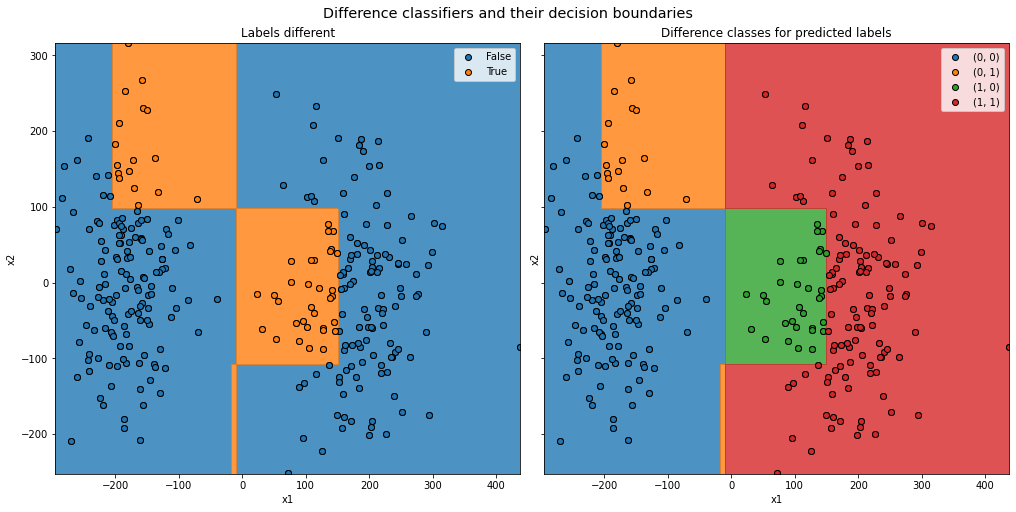

In [8]:
comparer.plot_decision_boundaries(X)

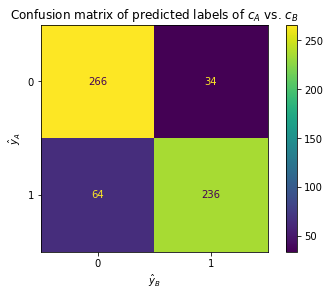

In [9]:
comparer.plot_confusion_matrix(X)

In [16]:
%%time
_ = generate_diro2c_explanation(X, 0, comparer, focus_class='(0, 1)', gn_population_size=1000)

CPU times: user 2.81 s, sys: 20.6 ms, total: 2.83 s
Wall time: 2.92 s


# Global explanations

## $(0,1)$

In [ ]:
focus_class = '(0, 1)'

In [13]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global', focus_class=focus_class, gn_population_size=1000)

CPU times: user 2min 50s, sys: 1.01 s, total: 2min 51s
Wall time: 2min 57s


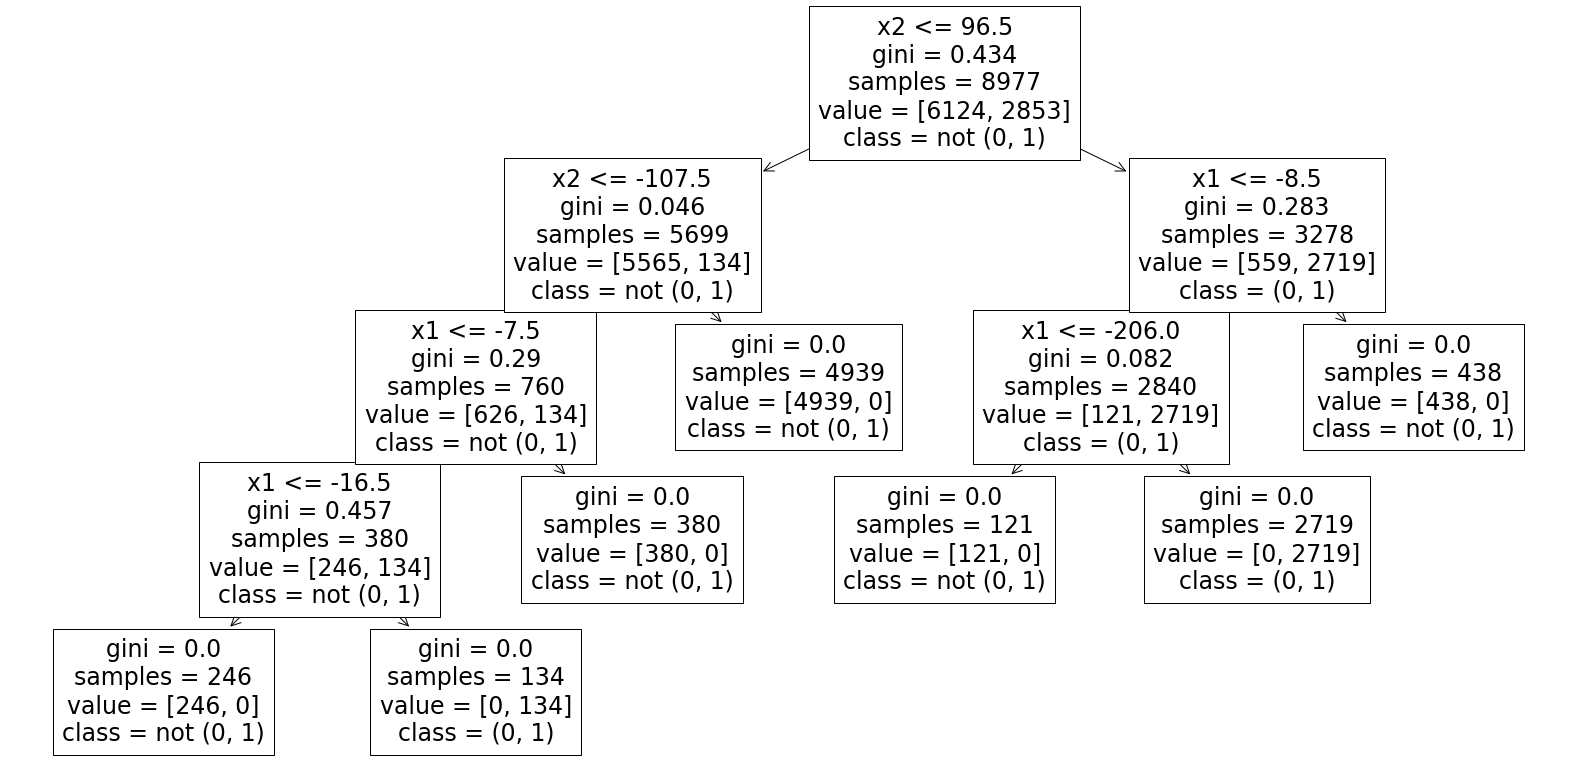

In [17]:
fig, ax = plt.subplots(figsize=(28, 14))
plot_diro2c_tree(explanation)

In [25]:
rules = get_rules(explanation['binary_diff_classifer']['dc_full'], comparer.feature_names, explanation['class_names'], focus_class)
[print(rule) for rule in rules];

if (x2 <= -107.5) and (x1 <= -7.5) and (x1 > -16.5) then class: (0, 1) (proba: 100.0%) | based on 134 samples
if (x2 > 96.5) and (x1 <= -8.5) and (x1 > -206.0) then class: (0, 1) (proba: 100.0%) | based on 2,719 samples


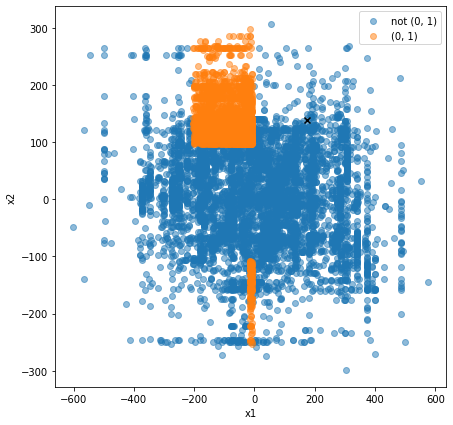

In [18]:
plot_diro2c_2d(explanation, 'x1', 'x2')

## $(1,0)$

In [26]:
focus_class = '(1, 0)'

In [27]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global', focus_class=focus_class, gn_population_size=1000)

CPU times: user 2min 59s, sys: 1.58 s, total: 3min 1s
Wall time: 3min 16s


simplified:
- $-7.5 < x1 ≤ 149.5 \land -107.5 < x2 ≤ 96.5$

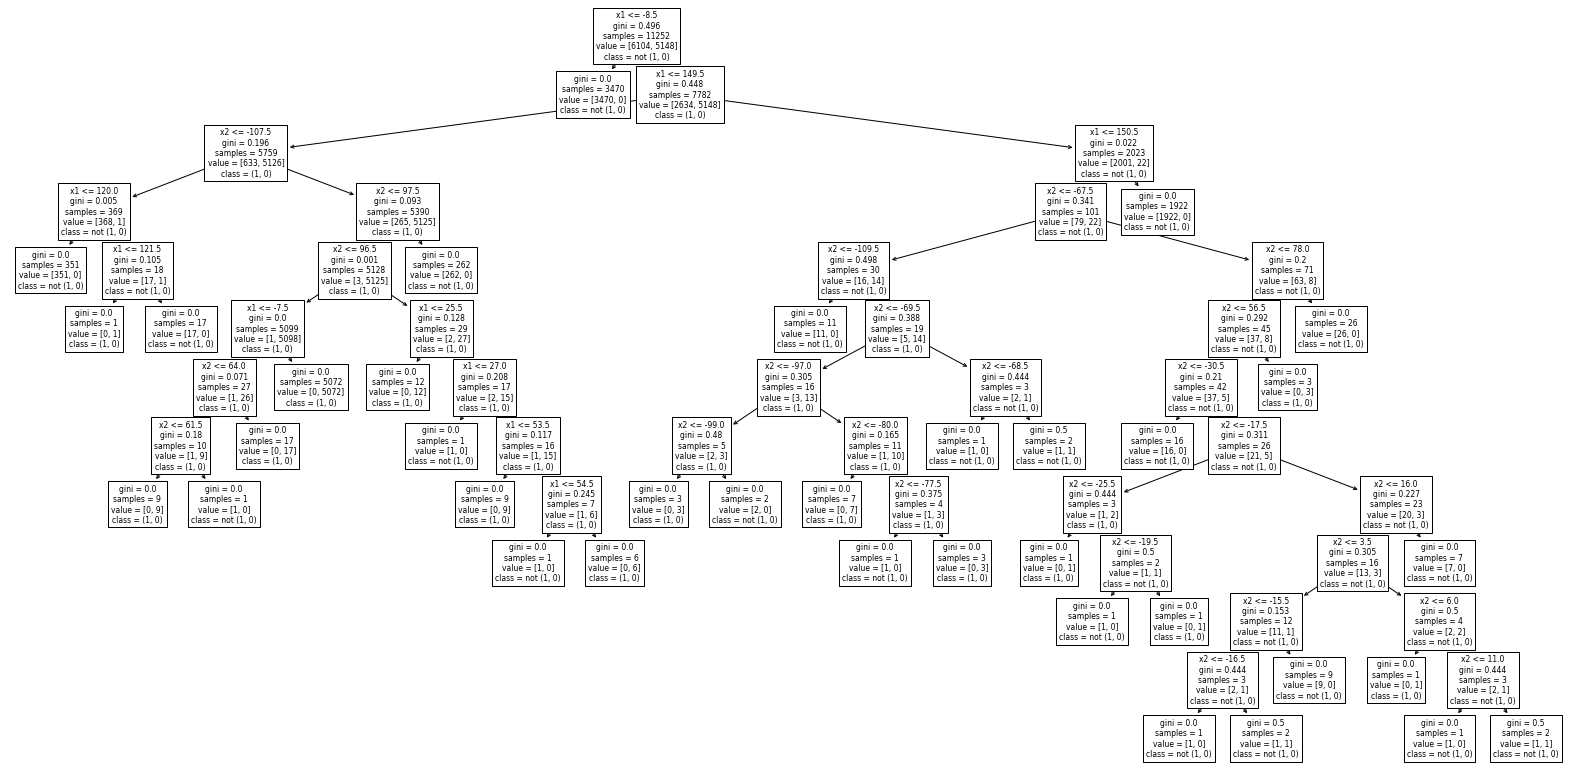

In [28]:
fig, ax = plt.subplots(figsize=(28, 14))
plot_diro2c_tree(explanation)

In [29]:
rules = get_rules(explanation['binary_diff_classifer']['dc_full'], comparer.feature_names, explanation['class_names'], focus_class)
[print(rule) for rule in rules];

if (x2 <= -107.5) and (x1 > 120.0) and (x1 <= 121.5) then class: (1, 0) (proba: 100.0%) | based on 1 samples
if (x1 > -8.5) and (x2 > -107.5) and (x1 <= -7.5) and (x2 <= 61.5) then class: (1, 0) (proba: 100.0%) | based on 9 samples
if (x1 > -8.5) and (x2 <= 96.5) and (x1 <= -7.5) and (x2 > 64.0) then class: (1, 0) (proba: 100.0%) | based on 17 samples
if (x1 <= 149.5) and (x2 > -107.5) and (x2 <= 96.5) and (x1 > -7.5) then class: (1, 0) (proba: 100.0%) | based on 5,072 samples
if (x1 > -8.5) and (x2 <= 97.5) and (x2 > 96.5) and (x1 <= 25.5) then class: (1, 0) (proba: 100.0%) | based on 12 samples
if (x2 <= 97.5) and (x2 > 96.5) and (x1 > 27.0) and (x1 <= 53.5) then class: (1, 0) (proba: 100.0%) | based on 9 samples
if (x1 <= 149.5) and (x2 <= 97.5) and (x2 > 96.5) and (x1 > 54.5) then class: (1, 0) (proba: 100.0%) | based on 6 samples
if (x1 > 149.5) and (x1 <= 150.5) and (x2 > -109.5) and (x2 <= -99.0) then class: (1, 0) (proba: 100.0%) | based on 3 samples
if (x1 > 149.5) and (x1 <= 

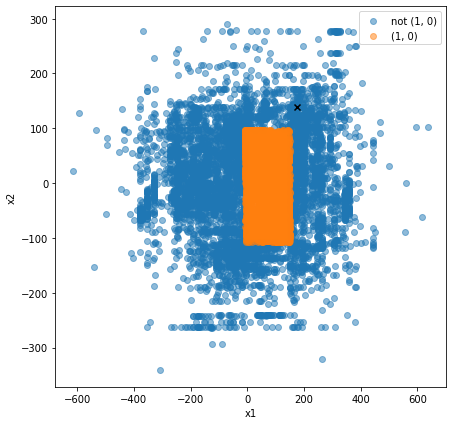

In [30]:
plot_diro2c_2d(explanation, 'x1', 'x2', highlight=X[0])